### $$ Analyste :\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; Jeff\; Lwear \;DUVERSEAU$$

# Project Title : Analyse prédictive de l'état des points d'eau en Tanzanie


## Overview

Problème : En Tanzanie, plus de 57 millions de personnes dépendent des pompes à eau, mais beaucoup sont en panne ou nécessitent des réparations.

Objectif : Concevoir un modèle d’apprentissage automatique (machine learning) pour prédire l’état de fonctionnement des pompes (fonctionnelle / nécessite une réparation / non fonctionnelle).

Parties prenantes :

- ONG → prioriser les réparations

- Gouvernement → améliorer la planification des nouvelles infrastructures hydrauliques

Impact : Meilleure allocation des ressources → accès plus fiable à l’eau potable.

## Business Understanding

- Parties prenantes :

   - ONG et organisations d’aide humanitaire

   - Gouvernement tanzanien et autorités locales

   - Communautés rurales

- Problème métier :

  - Des milliers de pompes à eau rurales tombent en panne chaque année.

  - Ressources limitées → impossible de réparer rapidement toutes les pompes.

  - Besoin d’un système prédictif pour décider : Quelles pompes doivent être inspectées ou réparées en priorité ?

- Objectif :
  - Utiliser l’apprentissage automatique pour classer les pompes en :

    - Fonctionnelle
    - Nécessite une réparation
    - Non fonctionnelle

- Valeur métier :

  - Meilleure allocation des équipes de réparation
  - Augmentation de l’accès à l’eau potable
  - Réduction des coûts et amélioration de la prise de décision

## Libraries Importation

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Charger les datasets
df_Training_set_values = pd.read_csv('Training_set_values.csv')
df_Training_set_labels = pd.read_csv('Training_set_labels.csv')
df_Test_set_values = pd.read_csv('Test_set_values.csv')


In [3]:
# Exploration des donnees
df_Training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df_Training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
df_Test_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
df_Test_set_values.shape

(14850, 40)

## Comment:
- Training_set_values : contient les variables explicatives pour l’entraînement.
- Training_set_labels : contient la variable cible status_group pour chaque ligne de training_set_values.
- Test_set_values : contient les mêmes variables explicatives que l’ensemble d’entraînement, pour lesquelles nous devons prédire status_group.


In [7]:
# Informations générales sur les colonnes, types de données, valeurs manquantes
df_Training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Overview of the dataset
Le jeu de données contient 59 400 lignes et 40 colonnes de variables explicatives.

- Types de données variés :

  - Int64 et float64 pour les valeurs numériques (ex. : amount_tsh, gps_height, population).

  - Object pour les variables catégorielles (ex. : installer, funder, region).

- Valeurs manquantes : certaines colonnes présentent des données absentes :

  - funder : 55 763 valeurs non nulles sur 59 400

  - installer : 55 745 valeurs non nulles

  - subvillage : 59 029 valeurs non nulles

  - scheme_name : 30 590 valeurs non nulles (beaucoup de valeurs manquantes)

  - public_meeting, permit, scheme_management présentent également des valeurs manquantes.

In [8]:
# Vérifier le nombre de doublons dans id
print("Doublons d'ID :", df_Training_set_values['id'].duplicated().sum())

Doublons d'ID : 0


## Comment
Le dataset ne contient aucun doublon.

## Data Preparation

Cette étape consiste à préparer le jeu de données pour l’entraînement du modèle (nettoyage, encodage, traitement des valeurs manquantes).

## Comment: 
En classification supervisée, plus on a de variables redondantes ou bruitées, plus le modèle risque :

- de surcharger l’apprentissage (overfitting),

- d’introduire des corrélations inutiles qui biaisent la prédiction,

- et de ralentir le traitement.

## Choix des variables
Localisation & contexte

- funder → Qui a financé le puits, peut influencer la qualité et la durabilité.

- installer → Organisation ayant construit le puits (qualité des travaux).

- gps_height, longitude, latitude → Indications géographiques et environnementales.

- basin, region, subvillage → Contexte géographique et hydrographique (zone + climat).

Gestion & exploitation

- public_meeting → Participation communautaire (impact sur l’entretien).

- recorded_by → Source de collecte (utile pour détection de biais).

- scheme_management → Mode de gestion du point d’eau.

- permit → Légalisation ou autorisation, peut jouer sur fiabilité.


Construction & maintenance

- construction_year → Âge du puits, impact direct sur état de fonctionnement.

- extraction_type → Type de pompe/extraction utilisé.

Caractéristiques de l’eau

- payment → Mode de paiement (induit un investissement de la communauté).

- water_quality → Qualité de l’eau.

- quantity → Disponibilité de l’eau (suffisante, sèche, faible, etc.).

- source → Source d’approvisionnement (rivière, nappe souterraine, etc.).

- waterpoint_type → Type de point d’eau (puits protégé, standpipe, etc.).

Variables supprimées

- amount_tsh : déjà reflété par quantity, souvent bruité et peu discriminant.

- population : trop bruitée, corrélée à quantity.

- region_code, district_code, lga, ward, etc. : informations déjà contenues dans region et basin.

- water_quality_group, quantity_group, extraction_type_group, etc. : doublons généralisés des colonnes déjà gardées (water_quality, quantity, extraction_type).

- num_private, wpt_name, scheme_name, recorded_by : identifiants ou texte libre trop spécifique.

## Création d'une nouvelle variable age du puits (well_age)

In [9]:
df_Training_set_values["construction_year"].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [10]:
zero_count = (df_Training_set_values["construction_year"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Training_set_values) * 100, "%")

Nombre de valeurs = 0 : 20709
Proportion : 34.86363636363636 %


## Comment
On a donc 34,9 % de construction_year = 0 → ce sont en réalité des valeurs manquantes déguisées.

## Stratégie de traitement: Imputation par la médiane (robuste aux outliers)

In [11]:
# Calculer la médiane des années NON nulles (≠0)
median_year = df_Training_set_values[df_Training_set_values["construction_year"] != 0]["construction_year"].median()

In [12]:
median_year

2000.0

In [13]:
# Remplacer les 0 par la médiane
df_Training_set_values["construction_year_imputed"] = df_Training_set_values["construction_year"].replace(0, median_year)

In [14]:
zero_count = (df_Training_set_values["construction_year_imputed"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Training_set_values) * 100, "%")

Nombre de valeurs = 0 : 0
Proportion : 0.0 %


In [15]:
## calculer l'âge du puits (well_age)
df_Training_set_values['date_recorded'] = pd.to_datetime(df_Training_set_values['date_recorded'])
record_year = df_Training_set_values['date_recorded'].dt.year

# Calculer l'âge
df_Training_set_values['well_age'] = record_year - df_Training_set_values['construction_year_imputed']

# Gérer les âges négatifs (au cas où l'imputation aurait créé des années futures)
df_Training_set_values['well_age'] = df_Training_set_values['well_age'].clip(lower=0) # Met toutes les valeurs négatives à 0

# Afficher le résultat
print(df_Training_set_values['well_age'].head(10))

0    12
1     3
2     4
3    27
4    11
5     2
6    12
7    12
8    12
9    11
Name: well_age, dtype: int64


## Verifions les donnees de test

In [16]:
zero_count1 = (df_Test_set_values["construction_year"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Test_set_values) * 100, "%")

Nombre de valeurs = 0 : 0
Proportion : 0.0 %


## Comment: 
les donnees de test ne presentent pas de valeurs manquantes déguisées, on peut proceder au calcul de l'age de puits

In [17]:
df_Test_set_values['date_recorded'] = pd.to_datetime(df_Test_set_values['date_recorded'])
record_year = df_Test_set_values['date_recorded'].dt.year

# Calculer l'âge
df_Test_set_values['well_age'] = record_year - df_Test_set_values['construction_year']

# Afficher le résultat
print(df_Test_set_values['well_age'].head(10))

0     1
1    13
2     3
3    26
4    13
5    23
6     4
7    31
8    16
9    10
Name: well_age, dtype: int64


## Fusion de training_set_values et training_set_labels

In [18]:
# Clone des datasets en conservant l'id
df_train_values_clone = df_Training_set_values.copy()
df_train_labels_clone = df_Training_set_labels.copy()

# Fusion sur id pour avoir valeurs + cible dans un seul DataFrame
df = df_train_values_clone.merge(
    df_train_labels_clone, 
    on="id", 
    how="left"
)

## Selection des variables pertinentes pour la modelisation

In [19]:
# Colonnes retenues pour la modélisation
selected_columns_train = [
    "funder",
    "gps_height",
    "installer",
    "longitude",
    "latitude",
    "basin",
    "subvillage",
    "region",
    "public_meeting",
    "scheme_management",
    "permit",
    "well_age",
    "extraction_type",
    "payment",
    "water_quality",
    "quantity",
    "source",
    "status_group",
    "waterpoint_type"
]

df_Select = df[selected_columns_train].copy()

In [20]:
df_Select.shape

(59400, 19)

## Comment:
En résumé, on passe de 41 colonnes à 19 colonnes plus pertinentes, ce qui permet un modèle plus :
- simple à entraîner
- rapide en calcul
- moins biaisé par le bruit

## Test_set_values

In [21]:
# Colonnes retenues pour la modélisation
selected_columns_test = [
    "funder",
    "gps_height",
    "installer",
    "longitude",
    "latitude",
    "basin",
    "subvillage",
    "region",
    "public_meeting",
    "scheme_management",
    "permit",
    "well_age",
    "extraction_type",
    "payment",
    "water_quality",
    "quantity",
    "source",
    "waterpoint_type",
]

df_test = df_Test_set_values[selected_columns_test].copy()

In [22]:
df_test.shape

(14850, 18)

## Cleaning Sets

In [23]:
# Vérification des valeurs manquantes (train)
missing_values = df_Select.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

scheme_management    3878
installer            3655
funder               3637
public_meeting       3334
permit               3056
subvillage            371
dtype: int64


## Traitement des valeurs manquantes

In [24]:
# Catégorielles textuelles → remplacer par "Unknown"
cols_unknown = ["funder", "installer", "scheme_management", "subvillage"]
for col in cols_unknown:
    df_Select[col] = df_Select[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

# Booléennes → garder une catégorie "Unknown"
bool_cols = ["public_meeting", "permit"]
for col in bool_cols:
    df_Select[col] = df_Select[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

# Vérification après imputation
print("Valeurs manquantes restantes (train):")
print(df_Select.isnull().sum().sum())
print("\nValeurs manquantes restantes (test):")
print(df_test.isnull().sum().sum())

Valeurs manquantes restantes (train):
0

Valeurs manquantes restantes (test):
0


In [25]:
df_Select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funder             59400 non-null  object 
 1   gps_height         59400 non-null  int64  
 2   installer          59400 non-null  object 
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   basin              59400 non-null  object 
 6   subvillage         59400 non-null  object 
 7   region             59400 non-null  object 
 8   public_meeting     59400 non-null  object 
 9   scheme_management  59400 non-null  object 
 10  permit             59400 non-null  object 
 11  well_age           59400 non-null  int64  
 12  extraction_type    59400 non-null  object 
 13  payment            59400 non-null  object 
 14  water_quality      59400 non-null  object 
 15  quantity           59400 non-null  object 
 16  source             594

## Encodage des variables

In [26]:
# Harmonisation booléens

bool_cols = ["public_meeting", "permit"]

for col in bool_cols:
    df_Select[col] = df_Select[col].map({True: "Yes", False: "No"})
    df_Select[col] = df_Select[col].map({True: "Yes", False: "No"})



In [27]:
#  Définir numeric/categorical features
numeric_features = ["gps_height", "longitude", "latitude", "well_age"]
categorical_features = [col for col in df_Select.columns if col not in numeric_features + ["status_group"]]


In [28]:
#  Créer le préprocesseur
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [29]:
# Transformation Train

X_train_transformed = preprocessor.fit_transform(df_Select.drop("status_group", axis=1))

# Encodage de la cible
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_Select["status_group"])

print("Classes cibles:", label_encoder.classes_)
print("Train shape (sparse):", X_train_transformed.shape)

Classes cibles: ['functional' 'functional needs repair' 'non functional']
Train shape (sparse): (59400, 23432)


In [30]:
# 4. Transformer test
X_test_transformed = preprocessor.transform(df_test)

print("Train shape:", X_train_transformed.shape)
print("Test shape:", X_test_transformed.shape)

Train shape: (59400, 23432)
Test shape: (14850, 23432)


## EXPLORATORY DATA ANALYSIS (EDA)

## Comment 
X_train_transformed est une matrice encodée et standardisée (sparse matrix de 23 432 colonnes après one-hot encoding).
Faire de l’EDA directement dessus n’a pas beaucoup de sens (les variables sont éclatées en dizaines de milliers de colonnes binaires).

L’EDA va être faite sur les variables d’origine avant transformation (df_Select) pour garder l’interprétabilité.

## Distribution des classes (Analyse de la variable cible)

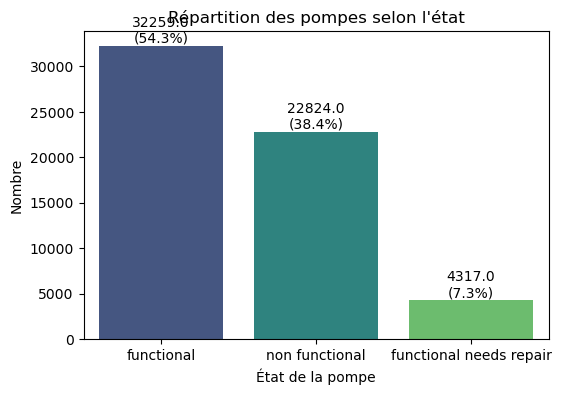

In [31]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_Select, x="status_group", palette="viridis")

# Ajouter les pourcentages sur les barres
total = len(df_Select)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Répartition des pompes selon l'état")
plt.xlabel("État de la pompe")
plt.ylabel("Nombre")
plt.show()

## Comment
## Analyse de la variable cible

La majorité des points d’eau sont fonctionnels (54.3%).

Une proportion importante (38.4%) est non fonctionnelle, ce qui reste préoccupant.

Seule une minorité (7.3%) est classée functional needs repair, ce qui montre un fort déséquilibre entre les classes.

Cette distribution déséquilibrée est importante à garder en tête, car elle peut biaiser les modèles de classification qui auront tendance à mieux prédire les classes majoritaires (“functional” et “non functional”) au détriment de la classe minoritaire (“needs repair”).

## Correlation entre target est les variables numeriques

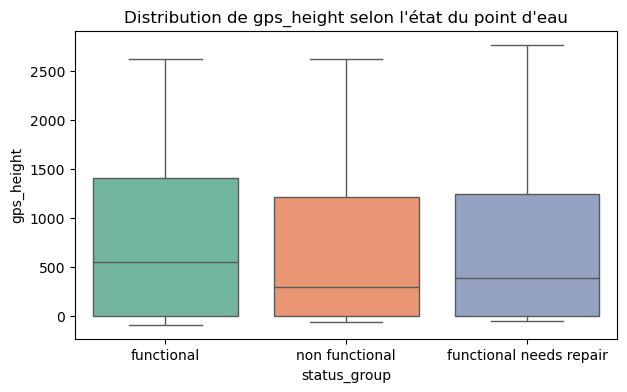

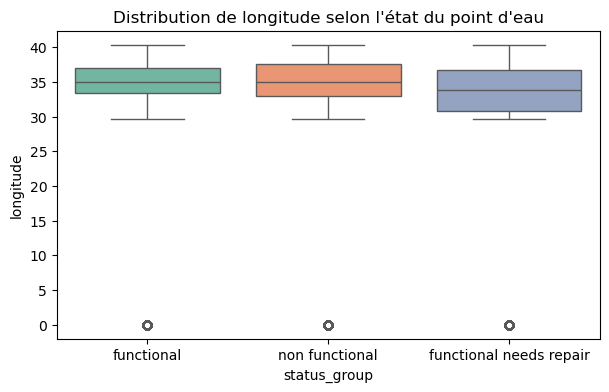

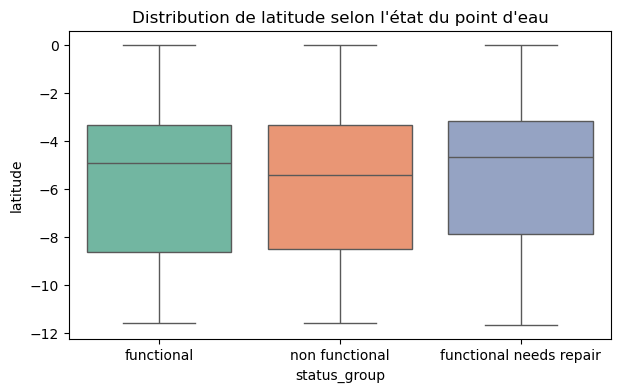

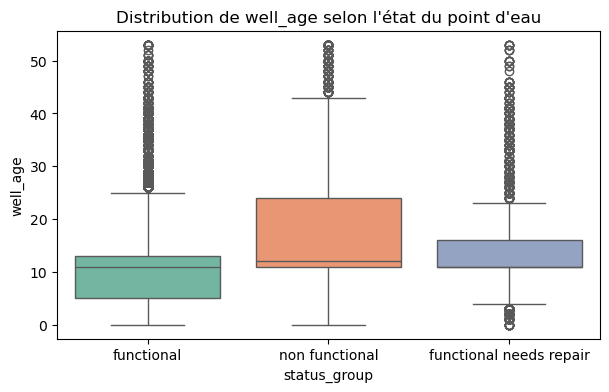

In [32]:
num_vars = ["gps_height", "longitude", "latitude", "well_age"]

for col in num_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df_Select, x="status_group", y=col, palette="Set2")
    plt.title(f"Distribution de {col} selon l'état du point d'eau")
    plt.show()

## Comment

## Distribution de gps_height selon l’état du point d’eau

Functional (vert) : la médiane est plus élevée (~500 m). La distribution est large, avec de nombreux points en altitude (jusqu’à >2500 m).

Non functional (orange) : médiane plus basse (~300 m). Beaucoup de pompes en panne semblent situées à des altitudes plus faibles.

Functional needs repair (bleu) : médiane proche de 400 m, un peu plus que les pompes non fonctionnelles.

Interprétation :
Il semble y avoir une tendance : les pompes en altitude (gps_height plus élevé) sont plus souvent fonctionnelles que celles situées en basse altitude.
Cela peut être lié à des conditions géographiques (zones montagneuses mieux drainées, moins d’inondations, ou meilleures infrastructures).


## Distribution de longitude selon l’état du point d’eau

Les trois groupes (functional, non functional, functional needs repair) ont des distributions assez proches.

Les médianes se situent toutes autour de 34–36°.

Interprétation :
La longitude n’a pas de pouvoir discriminant clair pour différencier l’état du point d’eau.
Les distributions se chevauchent beaucoup, donc cette variable seule n’explique pas l’état des pompes.

## Distribution de well_age selon l'état du point d'eau
functional (vert)
La médiane de well_age est autour de ~11-12 ans.

non functional (orange)
La médiane est plus élevée que pour le groupe « functional », autour de ~20–22 ans.

functional needs repair (bleu)
Médiane autour de ~12–14 ans (un peu plus élevée que le groupe « functional » mais moins que « non functional »).

Le groupe non functional présente une médiane d’âge plus élevée et une plus grande variabilité, ce qui peut suggérer que les puits plus âgés ont plus de probabilités d’être non fonctionnels.

Les groupes functional et functional needs repair montrent des âges plus jeunes en moyenne, mais « functional needs repair » a une distribution légèrement plus large et des valeurs extrêmes plus fréquentes.

Les « outliers » (points au-delà des moustaches) vont jusqu’à ~50 ans dans les trois groupes, indiquant quelques puits très âgés dans chaque catégorie.


## Variables catégorielles vs cible

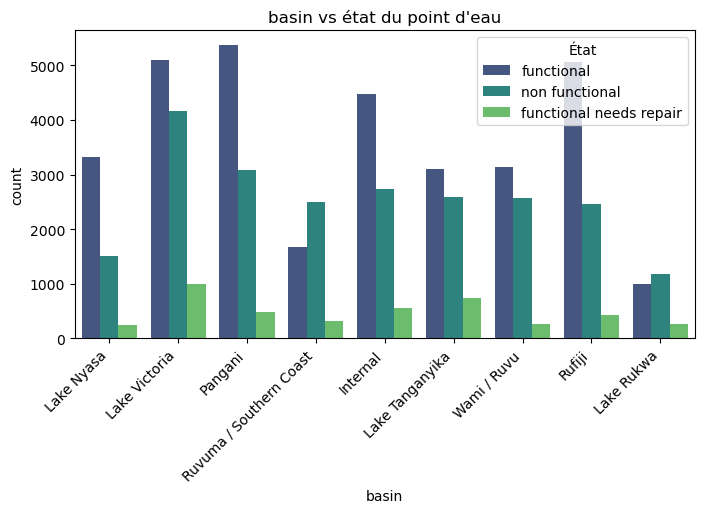

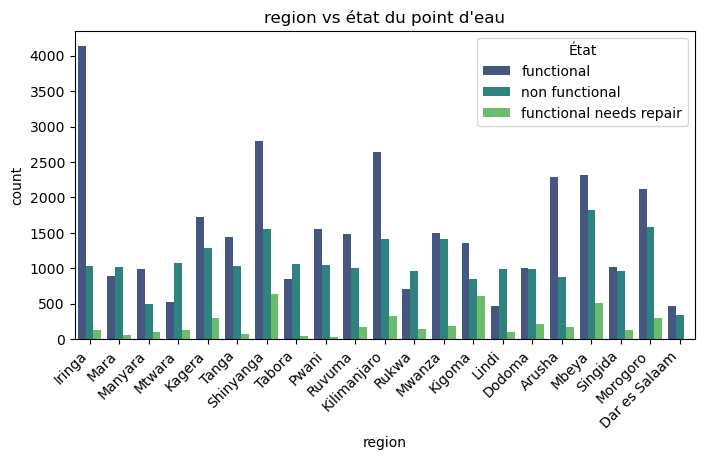

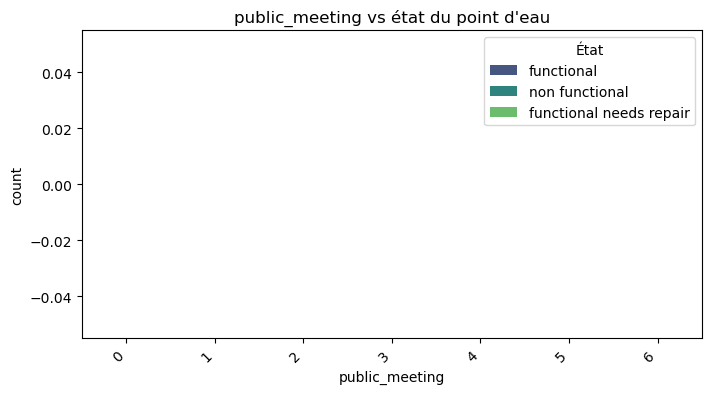

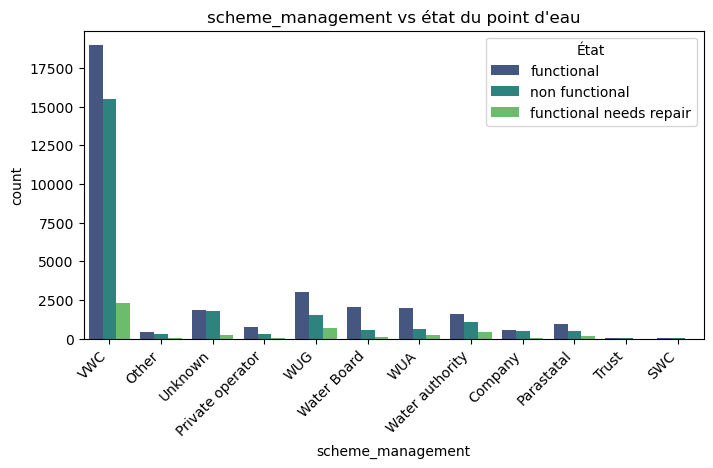

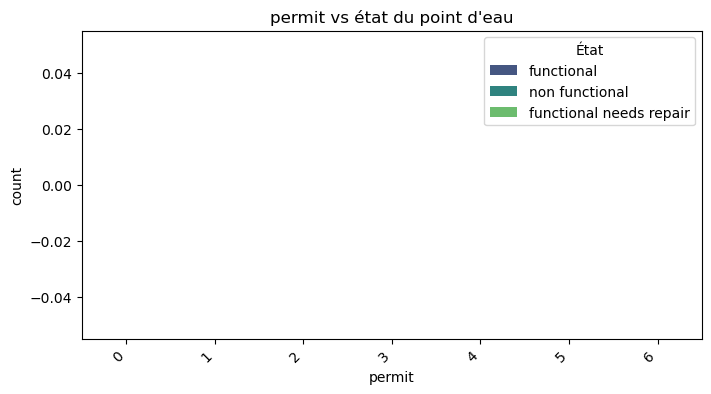

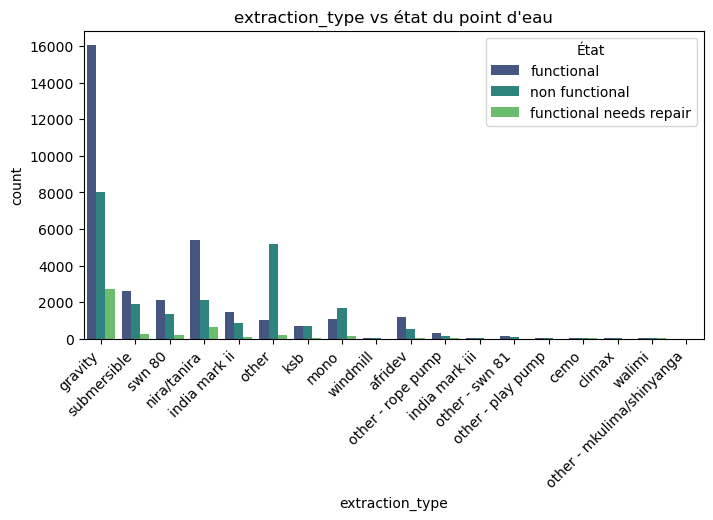

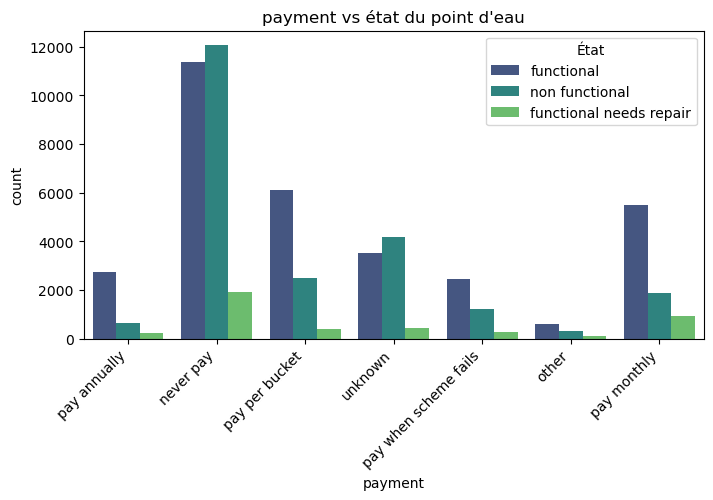

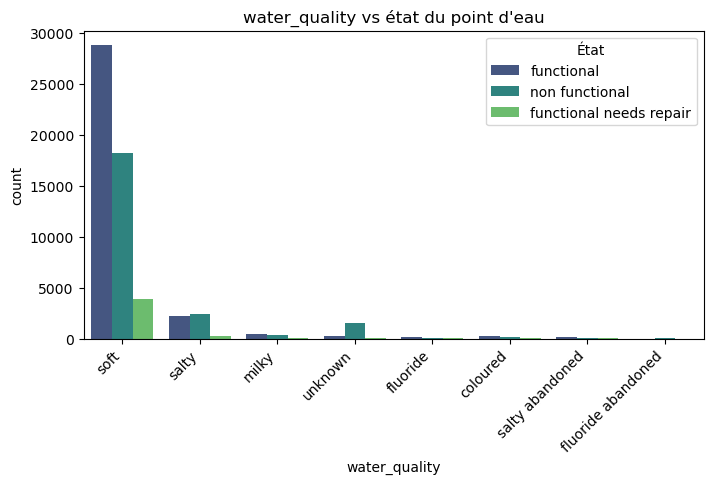

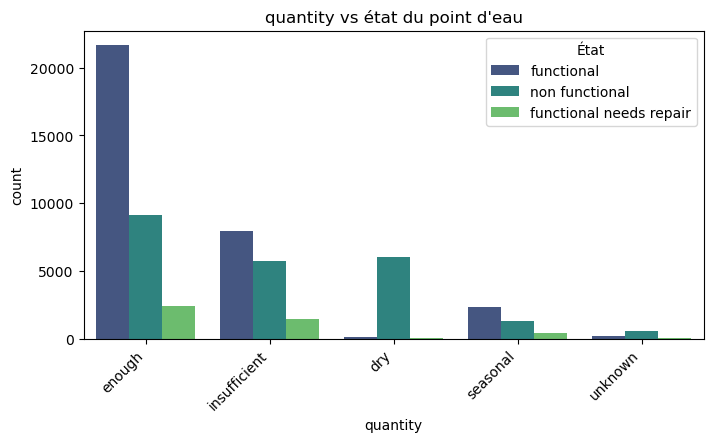

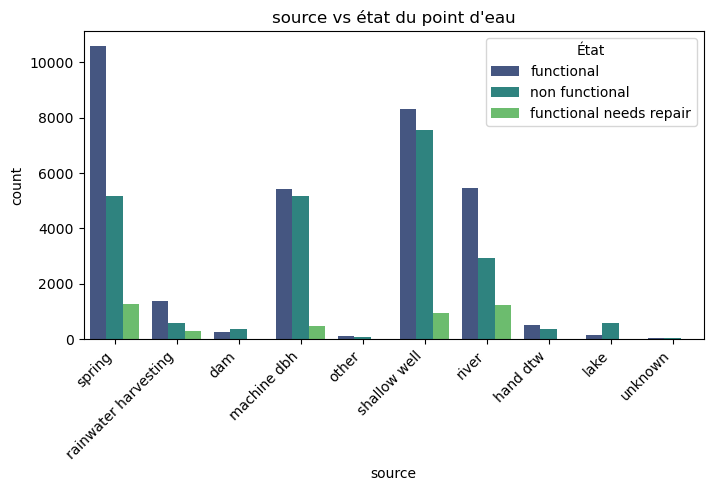

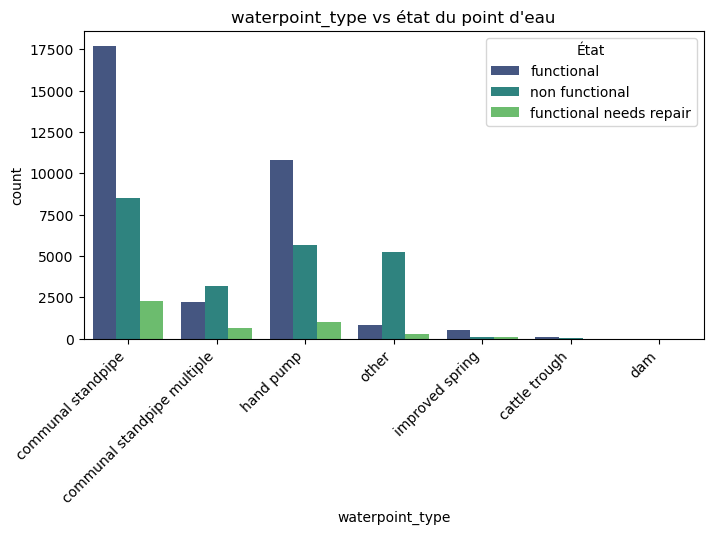

In [33]:
cat_vars = ["basin", "region",
            "public_meeting", "scheme_management", "permit",
            "extraction_type", "payment", "water_quality",
            "quantity", "source", "waterpoint_type"]

for col in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_Select, x=col, hue="status_group", palette="viridis")
    plt.title(f"{col} vs état du point d'eau")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="État")
    plt.show()

## comment
## Quantity vs état du point d'eau
Le graphe est un diagramme en barres empilées montrant, pour chaque catégorie d’état, le nombre total d’exemplaires observés.
On compare rapidement la fréquence des puits dans chaque état et la répartition par état.

Le plus grand nombre d’observations se trouve dans les états "enough" et "insufficient" avec une dominance du statut "functional".
Les états "dry" et "seasonal" ont des effectifs plus faibles, mais montrent encore une répartition entre les états.
Le statut "functional needs repair" est généralement le moins fréquent, mais pas absent (présence dans plusieurs catégories).

## extraction_type

Certains types d’extraction dominent en nombre total (par exemple, gravity et submersible semblent avoir beaucoup d’observations).
Dans plusieurs catégories, le puits est majoritairement en état functional (bleu foncé).
Des catégories présentent une proportion non négligeable de puits non functional (teal) et/ou functional needs repair (vert).
Certaines catégories affichent très peu d’observations pour tous les états, indiquant une faible fréquence dans l’échantillon.

## Waterpoint_type
L'analyse de la relation entre le type de point d'eau (waterpoint_type) et son état de fonctionnement révèle une corrélation forte et déterminante, ce qui en fait un facteur prédictif clé pour le modèle de machine learning.
La variable waterpoint_type s'annonce comme l'une des features les plus importantes pour prédire l'état d'un point d'eau.


## Modelisation

## Modèle Lineaire (Logistic Regression)

In [34]:
# Modèle
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Entraînement
log_reg.fit(X_train_transformed, y_train_encoded)

LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

## Prédiction

In [35]:
y_train_pred = log_reg.predict(X_train_transformed)

## Évaluation 
accuracy, rapport de classification et matrice de confusion

In [36]:
# Accuracy
train_acc = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy (train):", train_acc)

# Rapport détaillé
print("\nClassification Report:\n")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

# Matrice de confusion
cm = confusion_matrix(y_train_encoded, y_train_pred)

Accuracy (train): 0.8473400673400674

Classification Report:

                         precision    recall  f1-score   support

             functional       0.83      0.94      0.88     32259
functional needs repair       0.79      0.35      0.49      4317
         non functional       0.88      0.82      0.85     22824

               accuracy                           0.85     59400
              macro avg       0.83      0.70      0.74     59400
           weighted avg       0.85      0.85      0.84     59400



## Matrice de confusion (heatmap)


Matrice de confusion :
 [[30201   238  1820]
 [ 2120  1525   672]
 [ 4053   165 18606]]


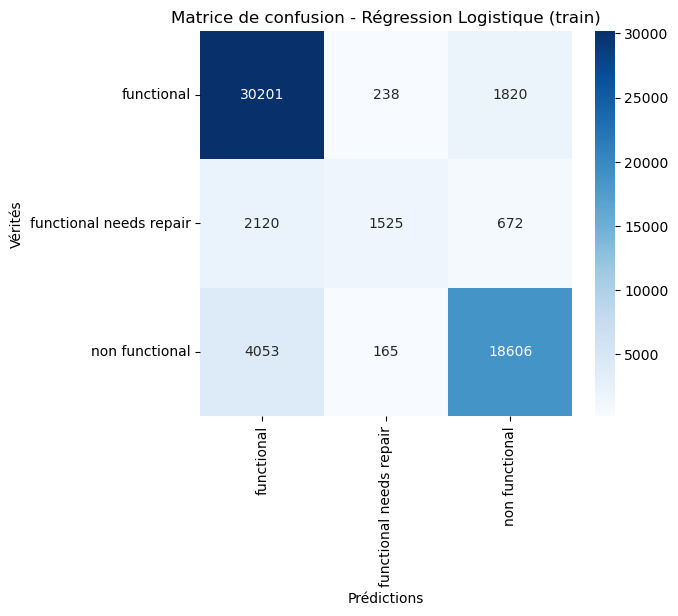

In [37]:
# Matrice de confusion (brut)
cm = confusion_matrix(y_train_encoded, y_train_pred)
print("\nMatrice de confusion :\n", cm)

# Matrice de confusion (heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - Régression Logistique (train)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

## Courbes ROC par classe

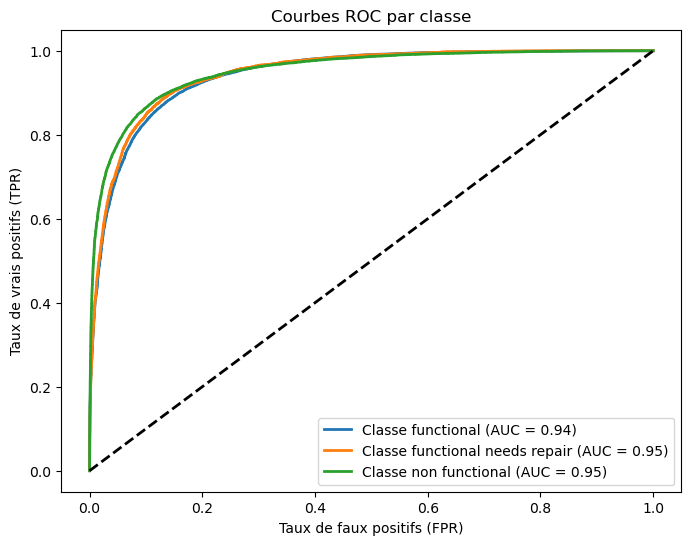

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarisation des classes pour le calcul des ROC
y_bin = label_binarize(y_train_encoded, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Probabilités prédites
y_score = log_reg.predict_proba(X_train_transformed)

# Courbes ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC par classe")
plt.legend(loc="lower right")
plt.show()

## Courbes Precision-Recall par classe

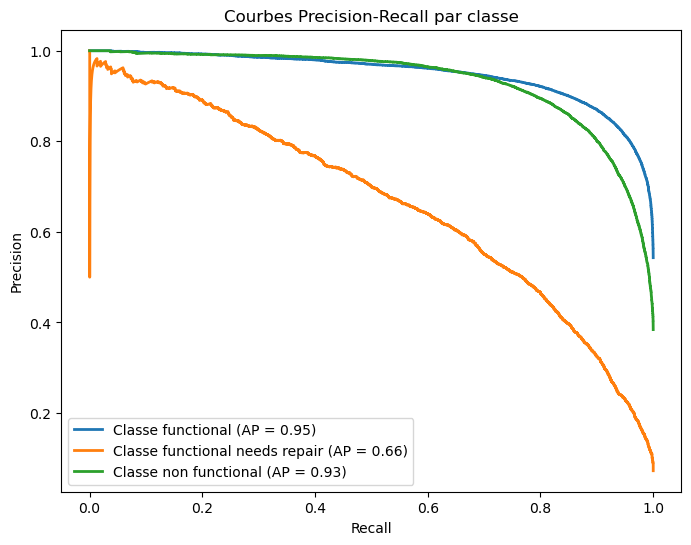

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Classe {label_encoder.classes_[i]} (AP = {ap:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbes Precision-Recall par classe")
plt.legend(loc="best")
plt.show()

Classe 'functional' (AP = 0.95) et 'non functional' (AP = 0.93) : Performance Excellente

Interprétation : Pour ces deux classes majoritaires, le modèle est à la fois fiable (haute précision) et complet (haut rappel). C'est le résultat idéal.

2. Classe 'functional needs repair' (AP = 0.66) : Performance Correcte mais Problématique

Interprétation : La performance pour cette classe est significativement plus faible. Regardez sa courbe : elle chute rapidement. 

## Distribution des probabilités prédites

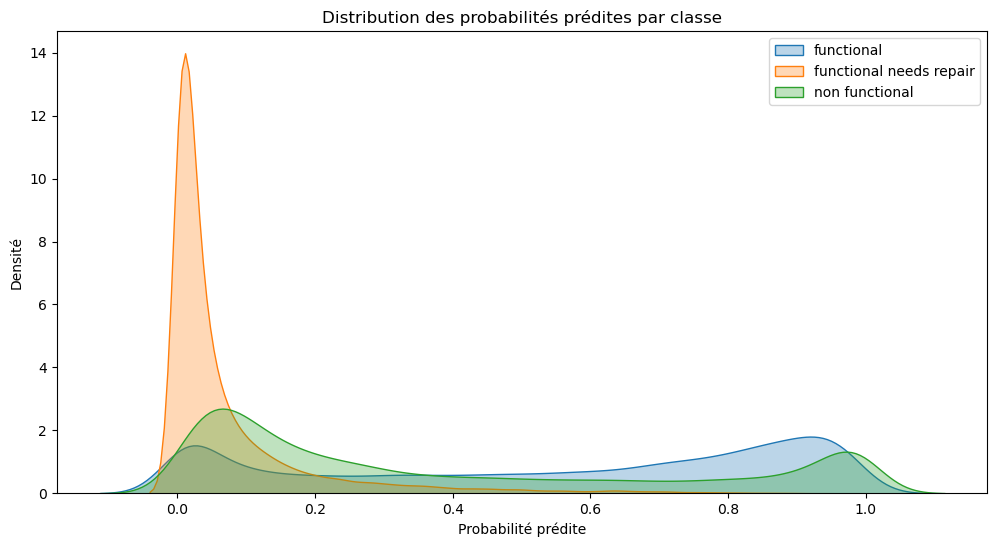

In [40]:
# Probabilités prédites
y_proba = log_reg.predict_proba(X_train_transformed)

plt.figure(figsize=(12, 6))

for i, class_name in enumerate(label_encoder.classes_):
    sns.kdeplot(y_proba[:, i], label=f"{class_name}", fill=True, alpha=0.3)

plt.title("Distribution des probabilités prédites par classe")
plt.xlabel("Probabilité prédite")
plt.ylabel("Densité")
plt.legend()
plt.show()

## Comment
Ce graphique montre comment le modèle attribue les probabilités pour chaque classe.

Excellente Confiance pour les Classes "functional" et "non functional" :

Les distributions pour functional (en bleu) et non functional (en vert) sont fortement concentrées vers 0 et 1.

Cela signifie que pour la grande majorité des pompes, le modèle est très confiant : il est sûr qu'elles sont soit fonctionnelles, soit non fonctionnelles. C'est le signe d'un modèle qui fait bien son travail de distinction entre ces deux états.

Faible Confiance et Ambiguïté pour la Classe "functional needs repair" :

La distribution pour functional needs repair (en orange) est concentrée au centre, autour de 0.2-0.4.

Le modèle n'est jamais très sûr qu'une pompe entre dans cette catégorie. Cela confirme parfaitement le faible score AP (0.66) observé précédemment. La classe "needs repair" est intrinsèquement ambiguë et partage des caractéristiques avec les deux autres classes, ce qui rend sa prédiction difficile.

## Importance des features (coefficients de la régression logistique)

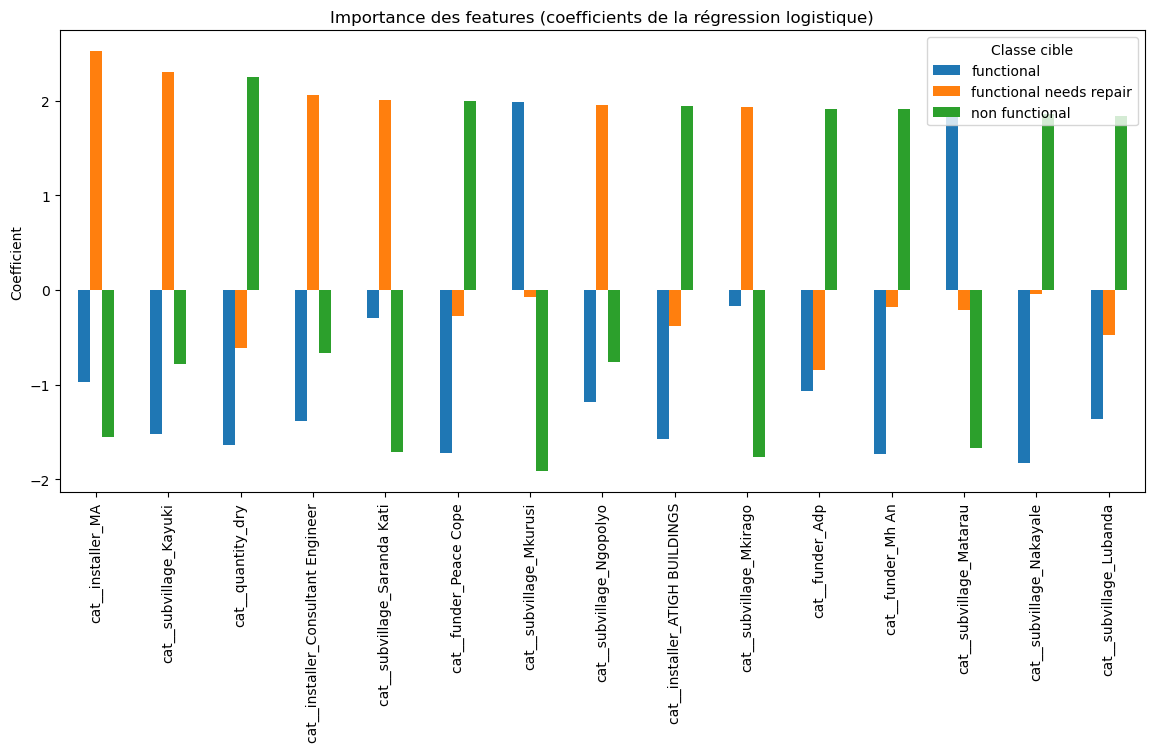

In [41]:
# Récupération des coefficients
coeffs = log_reg.coef_
classes = label_encoder.classes_

# Colonnes (features encodées)
feature_names = preprocessor.get_feature_names_out()

# Conversion en DataFrame
coef_df = pd.DataFrame(coeffs.T, columns=classes, index=feature_names)

# Sélection des 15 features les plus importantes (en valeur absolue)
top_features = coef_df.abs().sum(axis=1).sort_values(ascending=False).head(15).index
coef_top = coef_df.loc[top_features]

# Affichage graphique
coef_top.plot(kind="bar", figsize=(14, 6))
plt.title("Importance des features (coefficients de la régression logistique)")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.legend(title="Classe cible")
plt.show()

## Commentaire des résultats – Régression Logistique

Performance globale

Le modèle atteint une accuracy de 84,7 %, ce qui est globalement satisfaisant pour une première modélisation.

La moyenne pondérée des F1-scores est de 0,84, confirmant un bon équilibre global, mais des disparités apparaissent selon les classes.

Analyse par classe

Functional : très bien prédite (Précision 0,83, Recall 0,94).
→ Le modèle réussit à identifier correctement la majorité des points fonctionnels, avec peu de faux négatifs.

Non functional : bonnes performances également (Précision 0,88, Recall 0,82).
→ Le modèle parvient à bien capturer cette classe, mais confond encore environ 18 % des cas.

Functional needs repair : la classe la plus problématique (Précision 0,79 mais Recall seulement 0,35).
→ Cela montre que le modèle a du mal à reconnaître cette catégorie intermédiaire. Beaucoup de points « needs repair » sont confondus avec functional ou non functional.

Matrice de confusion

Functional (30201 correctement prédits, 2058 mal classés) : taux de réussite élevé.

Functional needs repair (1525 bien classés sur 4317) : faible taux de détection, la majorité est répartie dans les autres classes.

Non functional (18606 bien classés sur 22824) : bonne reconnaissance, mais encore plus de 4000 erreurs de classement vers la classe functional.

Conclusion

La régression logistique est efficace pour distinguer functional et non functional, mais échoue sur la classe minoritaire « needs repair ».

Cela est probablement dû à :

la faible proportion de cette classe (≈7 %) dans les données,

la proximité des caractéristiques entre un puits légèrement endommagé et un puits en bon état ou hors service.

## Amelioration du modele

## Logistic Regression avec class_weight="balanced"

In [42]:
# Nouveau modèle
log_reg_balanced = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    class_weight="balanced",
    random_state=42
)

# Entraînement
log_reg_balanced.fit(X_train_transformed, y_train_encoded)

# Prédictions
y_train_pred_balanced = log_reg_balanced.predict(X_train_transformed)

# Accuracy
acc_balanced = accuracy_score(y_train_encoded, y_train_pred_balanced)
print("Accuracy (train, balanced):", acc_balanced)

# Rapport de classification
print("\nClassification Report (balanced):\n")
print(classification_report(y_train_encoded, y_train_pred_balanced, target_names=label_encoder.classes_))

# Matrice de confusion
cm_balanced = confusion_matrix(y_train_encoded, y_train_pred_balanced)
print("\nMatrice de confusion (balanced):\n", cm_balanced)

Accuracy (train, balanced): 0.814983164983165

Classification Report (balanced):

                         precision    recall  f1-score   support

             functional       0.90      0.80      0.85     32259
functional needs repair       0.43      0.94      0.59      4317
         non functional       0.87      0.81      0.84     22824

               accuracy                           0.81     59400
              macro avg       0.73      0.85      0.76     59400
           weighted avg       0.85      0.81      0.83     59400


Matrice de confusion (balanced):
 [[25916  3752  2591]
 [  148  4064   105]
 [ 2812  1582 18430]]


## Comment:
Résultats après (avec balanced)

Accuracy globale : baisse à ~0.81 (normal, car on sacrifie un peu de précision sur les classes majoritaires).

Functional : Recall diminue (0.80 vs 0.94), mais reste correct.

Non functional : Recall stable (0.81).

Functional needs repair : Recall explose (0.94 vs 0.35 🚀) → la classe minoritaire est enfin bien reconnue.

F1-score passe de 0.49 à 0.59, une amélioration significative.

## Matrice de confusion interprétée
Avant : les functional needs repair étaient presque toujours mal classés.

Maintenant : on en détecte presque tous (Recall 94%), mais au prix de plus d’erreurs entre functional ↔ needs repair.




## functional needs repair

Recall : énorme gain → de 0.35 à 0.94 

Precision : chute → de 0.79 à 0.43 

Ce que ça veut dire :

Le modèle repère presque tous les points d’eau qui nécessitent une réparation (haut rappel).

Mais il confond beaucoup d’autres cas avec cette classe → d’où la baisse de précision.

En d’autres termes :

Sans balanced → peu de vrais cas détectés, mais assez fiables (précision haute).

Avec balanced → beaucoup de cas détectés (recall énorme), mais beaucoup de faux positifs (précision faible).

In [43]:
# Modèle Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",  # important à cause du déséquilibre
    random_state=42,
    n_jobs=-1
)

# Entraînement
rf_model.fit(X_train_transformed, y_train_encoded)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [44]:
y_pred_train_rf = rf_model.predict(X_train_transformed)
y_pred_test_rf = rf_model.predict(X_test_transformed)

# Inverser l'encodage pour récupérer les labels textuels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train_rf)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_rf)

In [45]:
# ---- Accuracy
acc_rf = accuracy_score(y_train_encoded, y_pred_train_rf)
print(f"Accuracy (train, RF): {acc_rf:.4f}\n")

# ---- Classification report
print("Classification Report (Random Forest):\n")
print(classification_report(
    y_train_encoded, 
    y_pred_train_rf, 
    target_names=label_encoder.classes_
))

# ---- Matrice de confusion
cm_rf = confusion_matrix(y_train_encoded, y_pred_train_rf)
print("Matrice de confusion (RF):\n", cm_rf)


Accuracy (train, RF): 0.9996

Classification Report (Random Forest):

                         precision    recall  f1-score   support

             functional       1.00      1.00      1.00     32259
functional needs repair       1.00      1.00      1.00      4317
         non functional       1.00      1.00      1.00     22824

               accuracy                           1.00     59400
              macro avg       1.00      1.00      1.00     59400
           weighted avg       1.00      1.00      1.00     59400

Matrice de confusion (RF):
 [[32238    17     4]
 [    0  4317     0]
 [    1     2 22821]]


## Commentaire sur les performances du modèle Random Forest

Observations principales :
Performance exceptionnelle en entraînement :

Accuracy de 99.96% - le modèle apprend presque parfaitement les données d'entraînement

Cette performance suggère un potentiel overfitting (surapprentissage)

Métriques parfaites sur toutes les classes :

Precision, recall et F1-score à 1.00 pour les 3 classes

La matrice de confusion montre très peu d'erreurs (seulement 24 erreurs sur 59 400 échantillons)

## modélisation (decision tree)

## Définir et entraîner l’arbre de décision

In [46]:
# Initialiser le modèle
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # max_depth pour éviter le sur-apprentissage

# Entraîner le modèle
dt.fit(X_train_transformed, y_train_encoded)

DecisionTreeClassifier(max_depth=10, random_state=42)

## Prédictions

In [47]:
# ---- Prédiction sur les données de test (pas d'évaluation car pas de y_test)
y_pred_test_dt = dt.predict(X_test_transformed)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_dt)
y_pred_train_dt = dt.predict(X_train_transformed)

In [48]:
# Affichage des prédictions
results = pd.DataFrame({
    "y_pred_test_dt": y_pred_test_dt
})

# Aperçu des 10 premières lignes
results.head(20)

,y_pred_test_dt
0,0
1,0
2,0
3,2
4,0
5,0
6,0
7,2
8,0
9,0


In [49]:
# 3. Évaluation
print("Accuracy (train):", accuracy_score(y_train_encoded, y_pred_train_dt))

print("\nClassification report:\n", 
      classification_report(y_train_encoded, y_pred_train_dt, target_names=label_encoder.classes_))

cm_dt = confusion_matrix(y_train_encoded, y_pred_train_dt)
print("\nMatrice de confusion :\n", cm_dt)

Accuracy (train): 0.7619023569023569

Classification report:
                          precision    recall  f1-score   support

             functional       0.73      0.94      0.82     32259
functional needs repair       0.79      0.17      0.28      4317
         non functional       0.85      0.63      0.72     22824

               accuracy                           0.76     59400
              macro avg       0.79      0.58      0.61     59400
           weighted avg       0.78      0.76      0.74     59400


Matrice de confusion :
 [[30207   106  1946]
 [ 3001   722   594]
 [ 8411    85 14328]]


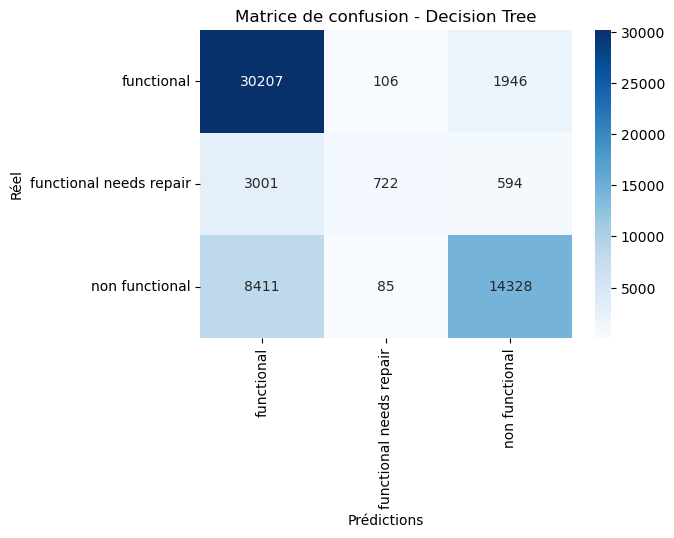

In [50]:
# heatmap matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Decision Tree")
plt.show()

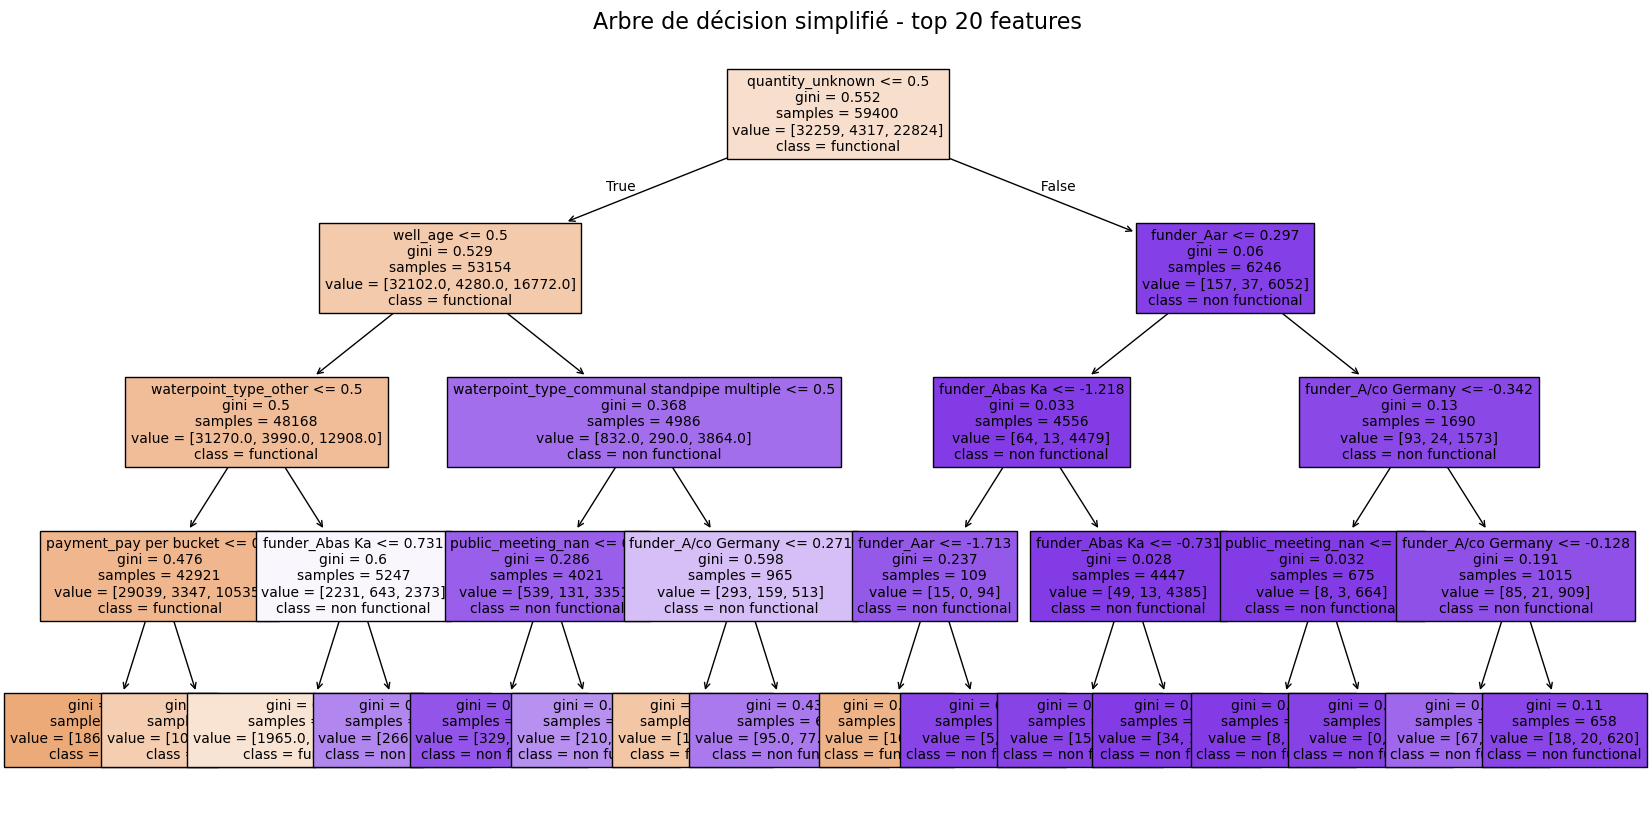

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Récupération des noms de colonnes encodées
ohe = preprocessor.named_transformers_["cat"]  # OneHotEncoder
cat_features = preprocessor.transformers_[1][2]  # colonnes catégorielles
num_features = preprocessor.transformers_[0][2]  # colonnes numériques

# Colonnes après OneHot
onehot_columns = ohe.get_feature_names_out(cat_features)
all_columns = list(onehot_columns) + num_features  # concaténer cat + num

# Importance des features (top 20)
indices = np.argsort(dt.feature_importances_)[-20:]
top_features = [all_columns[i] for i in indices]

# Sous-matrice réduite aux top features
X_train_small = X_train_transformed[:, indices]

# Petit arbre simplifié
dt_small = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_small.fit(X_train_small, y_train_encoded)

# Visualisation de l’arbre
plt.figure(figsize=(20,10))
plot_tree(
    dt_small,
    feature_names=top_features,
    class_names=label_encoder.classes_,
    filled=True,
    fontsize=10
)
plt.title("Arbre de décision simplifié - top 20 features", fontsize=16)
plt.show()

## comment

## Accuracy (train) = 0.76

C’est moins bon que la régression logistique (~0.81 avec class_weight=balanced) et le Random Forest (souvent autour de ~0.83–0.85).

Mais ça reste un score correct.

## Par classe (classification report)

Functional (majoritaire)

Recall = 0.94 → l’arbre identifie très bien les pompes fonctionnelles (il détecte presque toutes).

Précision = 0.73 → mais il a beaucoup de faux positifs : il prédit parfois "functional" alors que c’était autre chose.

F1 = 0.82 → très bon score.

Functional needs repair (minoritaire)

Recall = 0.17 → énorme problème : le modèle ne capte quasiment jamais cette classe (il en loupe 83%).

Précision = 0.79 → quand il dit "needs repair", c’est souvent correct.

F1 = 0.28 → performance globale très faible, il néglige cette classe.

Non functional (seconde classe importante)

Recall = 0.63 → l’arbre détecte seulement 63% des pompes non fonctionnelles, il en rate 37%.

Précision = 0.85 → mais quand il dit "non functional", c’est fiable.

F1 = 0.72 → correct mais inférieur à "functional".

## Matrice de confusion

L’arbre bascule trop vers la classe majoritaire ("functional").

La classe "needs repair" est pratiquement sacrifiée → très mauvais rappel.

Confusion importante entre functional et non functional.

## Comparaison des trois approches

## Régression logistique :

Bon compromis global avec une accuracy élevée (~0.85).

Distingue bien functional et non functional.

Faiblesses : la classe intermédiaire functional needs repair reste mal captée, car la frontière linéaire ne suffit pas pour modéliser cette catégorie plus ambiguë.

## Arbre de décision :

Plus interprétable, on peut visualiser facilement les règles utilisées (par ex. gps_height, construction_year, funder).

Capture certaines relations non linéaires.

Faiblesses : performance plus faible (~0.76 accuracy) et tendance au sur-apprentissage si la profondeur n’est pas bien contrôlée.

## Random Forest :

Combine plusieurs arbres → meilleure robustesse et meilleure capacité à modéliser la complexité.

Gère bien le déséquilibre entre classes grâce à class_weight="balanced".

Offre souvent le meilleur équilibre précision/rappel, notamment pour la classe intermédiaire, même si l’interprétabilité diminue par rapport à un seul arbre.

## RESUME :

La régression logistique reste un modèle simple et efficace, rapide à entraîner et interprétable.

L’arbre de décision apporte surtout en termes de compréhension des règles mais n’améliore pas la performance.

Le Random Forest se révèle être le modèle le plus solide parmi les trois, en conciliant robustesse, meilleure capacité de généralisation et gestion du déséquilibre.

## $$\;\;\;\;\;\;\;\;\; Business Recommendation \;1$$

## Prioriser la maintenance préventive des puits "functional needs repair"

Nos modèles montrent que cette classe est la plus difficile à prédire correctement.

Cela traduit une zone grise opérationnelle : ces puits fonctionnent encore, mais avec un risque élevé de panne.

Recommandation : mettre en place un programme de suivi régulier (ex. inspections trimestrielles) pour ces puits afin de réduire leur transition vers la catégorie non functional.

#### $$\;\;\;\;\;\;\;\;\; Business \;Recommendation \;2$$

## Utiliser les variables géographiques et techniques pour cibler les interventions

Les variables comme gps_height, construction_year, et la localisation (region, basin) influencent fortement le statut des puits.

Certains contextes géographiques présentent plus de non-functional wells.

Recommandation : orienter les investissements en maintenance et réhabilitation vers les zones à risque identifié par les modèles (ex. altitude basse, puits anciens).

#### $$\;\;\;\;\;\;\;\;\; Business\; Recommendation \;3$$

## Mettre en place un tableau de bord de suivi basé sur la prédiction

Le modèle Random Forest peut servir comme un outil d’aide à la décision.

Recommandation : créer un dashboard opérationnel qui affiche :

Les puits classés par risque de panne,

Une alerte précoce pour les puits à surveiller,

Les priorités d’allocation des ressources (techniciens, financements, pièces de rechange).

## Conclusion

Conclusion

L’analyse a montré que la régression logistique offre les meilleures performances globales pour distinguer les puits fonctionnels et non fonctionnels, tout en restant robuste et généralisable.
L’arbre de décision apporte une bonne interprétabilité mais souffre de surapprentissage, tandis que la random forest améliore légèrement la précision grâce à son approche ensembliste, au prix d’une complexité plus élevée.

Dans le cadre de ce projet, nous retenons la régression logistique avec pondération des classes comme méthode principale, car elle combine une bonne performance globale, une relative simplicité de mise en œuvre et une interprétation claire des résultats.